# MULTIPLE - Hybrid Spectral Net

In [1]:
%%capture
!python -m pip install abraia

import os
if not os.getenv('ABRAIA_ID') and not os.getenv('ABRAIA_KEY'):
    #@markdown <a href="https://abraia.me/console/" target="_blank">Get your Abraia Id and Key</a>
    abraia_id = ''  #@param {type: "string"}
    abraia_key = ''  #@param {type: "string"}
    %env ABRAIA_ID=$abraia_id
    %env ABRAIA_KEY=$abraia_key

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from abraia import Multiple, hsi

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
 
multiple = Multiple()

## Data loading

In [2]:
dataset = 'IP'
X, y, class_names = hsi.load_dataset(dataset)

print(f'HSI image size (width, height, bands): {X.shape}')
summary = pd.DataFrame([{'class_name': label, 'samples': np.sum(y == val)} for val, label in enumerate(class_names)])
summary.iloc[1:]

HSI image size (width, height, bands): (145, 145, 200)


,class_name,samples
1,Alfalfa,46
2,Corn-notill,1428
3,Corn-mintill,830
4,Corn,237
5,Grass-pasture,483
6,Grass-trees,730
7,Grass-pasture-mowed,28
8,Hay-windrowed,478
9,Oats,20
10,Soybean-notill,972


## Model training and validation

In [ ]:
patch_size = 25
K = 30 if dataset == 'IP' else 15

model = hsi.create_model('hsn', (patch_size, patch_size, K), len(class_names))
y_test, y_pred = model.train(X, y, train_ratio=0.5, epochs=20)
model.plot_history()

print('Overall accuracy', hsi.accuracy_score(y_test, y_pred))
print(hsi.classification_report(y_test, y_pred, target_names=class_names))
print(hsi.confusion_matrix(y_test, y_pred))

## Classification results

In [6]:
output = model.predict(X)

(-0.5, 144.5, 144.5, -0.5)

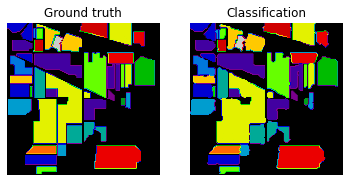

In [7]:
hsi.plot_images([y, output], ['Ground truth', 'Classification'])